In [27]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from scipy.misc import derivative

def returnStencilCoefficients(n,l,d,h):
    a = [j - l for j in range(1, n + 1)]  # Relative positions of stencil points
    # Construct matrix A (Vandermonde-like matrix)
    A = [[a[j]**i for j in range(n)] for i in range(n)]
    # Construct vector b (condition vector)
    b = [math.factorial(d) if i == d else 0 for i in range(n)]
        
    A_inv = np.linalg.inv(A)
    
    # h = 0.1 

    # computing the stenctil coefficients c1,c2,..... (given in text as a,b,c.....)
    D = 1/h**d * np.dot(A_inv, b)
        
    return D

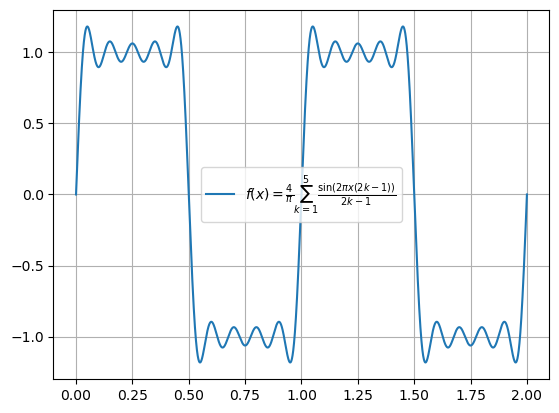

In [ ]:
a = 0
b = 2
N = 200
# or can be assessed as N+1 points on the grid, N=10
h = (b-a)/N

x_val = np.linspace(a,b,N+1)

def f(x):
    summation = sum((np.sin(2 * np.pi * x * (2 * k - 1)) / (2 * k - 1)) for k in range(1, 6))
    return (4 / np.pi) * summation

fx_vals = f(x_val)
plt.plot(x_val, fx_vals,"-" ,  label=r"$f(x) = \frac{4}{\pi} \sum_{k=1}^{5} \frac{\sin(2\pi x (2k-1))}{2k-1}$")
plt.legend()
plt.grid()

f_prime = np.zeros(len(x_val))

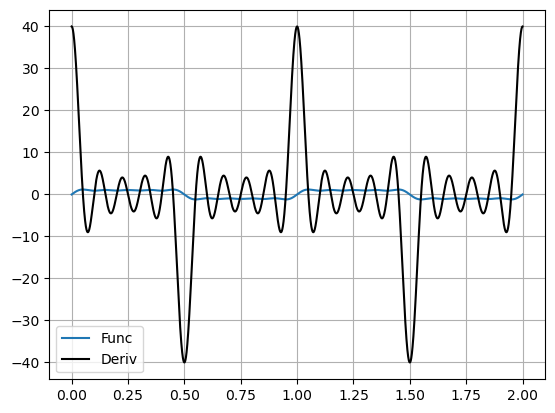

In [29]:
central_5_point_stencil = returnStencilCoefficients(5, (5+1)//2, 1, h)
#applying the 3 point scheme to the central elements
for i in range(2,len(fx_vals)-2): # leaving first and last ones out
    # temp_x = [round(x_val[k],2) for k in range(i-1,i+1+1)]
    # print(temp_x) 
    # properly being accessed
    
    temp_x = [fx_vals[k] for k in range(i-2,i+1+2)] # gives a 5-point array to calculate the derivative at current index
    
    f_prime[i] = np.dot(central_5_point_stencil, np.transpose(temp_x))
    
forward_5_point_stencil = returnStencilCoefficients(5, 1, 1, h)
for i in range(0,1+1): # first two only
    
    temp_x = [fx_vals[k] for k in range(i, i+5)] # gives a 5-point array to calculate the derivative at current index
    # print(temp_x)
    
    f_prime[i] = np.dot(forward_5_point_stencil, np.transpose(temp_x))
    
backward_5_point_stencil = returnStencilCoefficients(5, 5, 1, h)
for i in range(N-1,N+1): # first two only
    temp_x = [fx_vals[k] for k in range((i+1)-5, i+1)] # gives a 5-point array to calculate the derivative at current index
    
    f_prime[i] = np.dot(backward_5_point_stencil, np.transpose(temp_x))
    
plt.plot(x_val, fx_vals,"-" ,  label = "Func")
plt.plot(x_val, f_prime, "k", label = "Deriv")
plt.legend()
plt.grid()